# Mean-Variance Optimization
This notebook explores optimally risky portfolios using the mean-variance criterion. This notebook uses the PyPortfolioOpt python package for optimization (https://pyportfolioopt.readthedocs.io/en/latest/). After exploring the foundations behind mean-variance analysis, the notebook explores more complex portfolio strategies employing mean-variance optimization concepts. These ideas were formed by William Sharpe and Harry Markowitz.

In [73]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

from pypfopt import plotting
from pypfopt import expected_returns
from pypfopt import EfficientFrontier

# Settings
plt.style.use('ggplot')

In [74]:
# Parameters
DAYS = 252
YEARS = 5
RISK_FREE = 0.0424

tickers = [
    'AAPL', 'MSFT', 'COST', 'NKE', 'GOOG',
    'AAL', 'LHX', 'RTX', 'WMT', 'KO',
    'KMB', 'AMZN', 'JPM',  'AMD', 'GM',
    'MET', 'BAC', 'LEVI', 'NVDA', 'GAP'
]

# Download the data
# Use the past 5-years of daily returns
data = yf.download(tickers, period='5y', interval='1d', auto_adjust=True)['Close']

[*********************100%***********************]  20 of 20 completed


In [75]:
# Compute the daily returns
# Fill first Nan with 0
returns = data.pct_change()
returns.fillna(0, inplace=True)

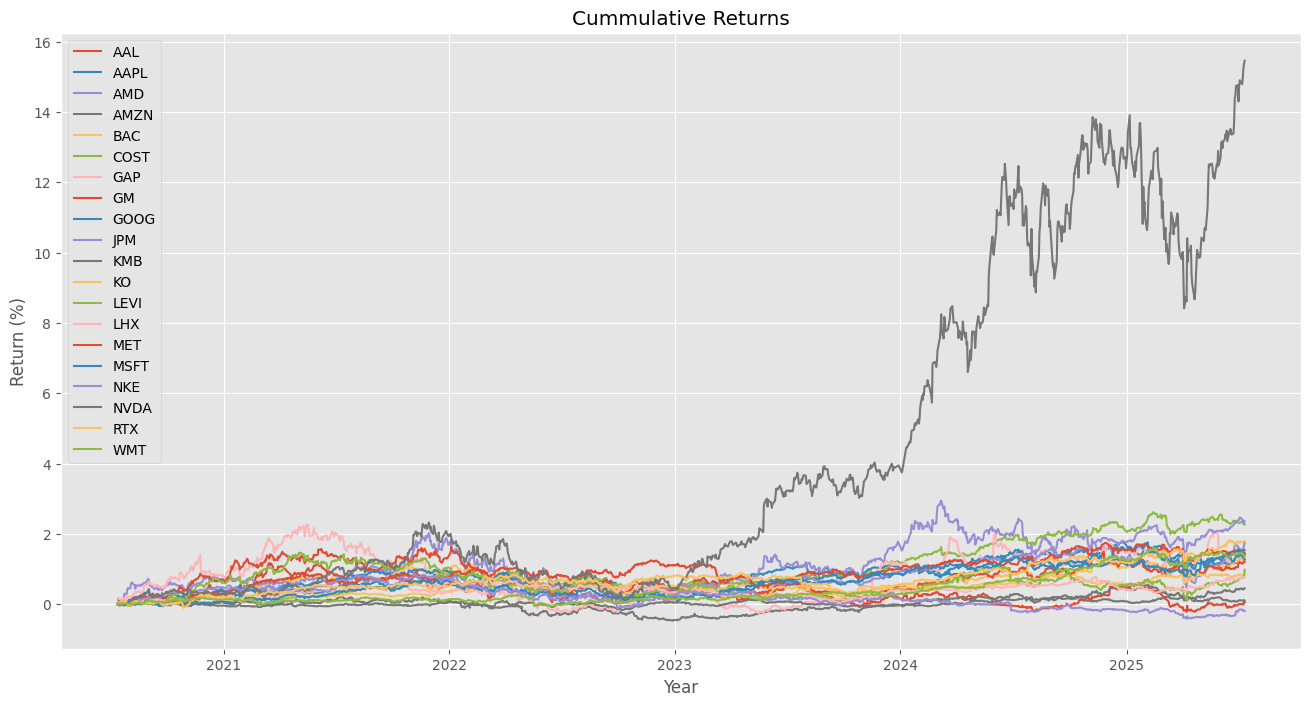

In [76]:
# Plot the cummulative returns of each stock
cumm_returns = (1 + returns).cumprod() - 1

plt.figure(figsize=(16, 8))
plt.plot(cumm_returns, label=cumm_returns.columns)
plt.legend()
plt.title('Cummulative Returns')
plt.xlabel('Year')
plt.ylabel('Return (%)')
plt.show()

### Portfolio Statistics
In this example, the expected return is estimated as the mean return from the 5-year historical data. The covariance matrix is estimated using the relation between each stock's 5-year historical returns. Both the expected return and covariance matrix are computed on an annualized basis.<br>
<br>
$E[r_p]=\sum_{i=1}^{n}w_iE[r_i]$, where <br>
$E[r_i]=(1+r_t)^{1/n}-1$, where <br>
$r_t =$ total return
<br>
<br>
$\sigma_p^2=\sum_{i=1}^{n}\sum_{j=1}^{n}w_iw_jCov(r_i,r_j)$

In [77]:
# Compute the expected returns
expected_returns = expected_returns.mean_historical_return(data)

In [78]:
# Calculate the covariance matrix
covariance_matrix = returns.cov() * DAYS

### Mean-Variance Optimization
The Sharpe ratio adjusts the risk premium for a security by its risk (risk-adjusted return). The Sharpe ratio for portfolio P is given by<br>
<br>
$S_p=\frac{E[r_P]-r_f}{\sigma_P}$
<br>
<br>
The optimally risky portfolio is the one that has the highest expected return and the lowest standard deviation. This results in the portfolio with the highest Sharpe ratio. The slope of the capital allocation line (CAL) is the Sharpe ratio. The tangency portfolio is the portfolio with the highest CAL tangent from the risk free rate to the efficient frontier (portfolio set on the minimum-variance frontier above the global minimum portfolio).
<br>
<br>
The optimization (maximization) problem is:<br>
<br>
$max_{w_i}S_p$ subject to $\sum_{i=1}^{n}w_i=1$

In [79]:
# Create the efficient fontier, using traditional mean-variance optimization
frontier = EfficientFrontier(expected_returns, covariance_matrix)
portfolio_weights = frontier.max_sharpe(risk_free_rate=RISK_FREE)

print(portfolio_weights)

OrderedDict({'AAL': 0.0, 'AAPL': 0.0, 'AMD': 0.0, 'AMZN': 0.0, 'BAC': 0.0, 'COST': 0.1747309686785875, 'GAP': 0.0, 'GM': 0.0, 'GOOG': 0.0, 'JPM': 0.1991496675625404, 'KMB': 0.0, 'KO': 0.0668219285383612, 'LEVI': 0.0, 'LHX': 0.0, 'MET': 0.0, 'MSFT': 0.0, 'NKE': 0.0, 'NVDA': 0.2825947363786581, 'RTX': 0.1526298483051822, 'WMT': 0.1240728505366708})


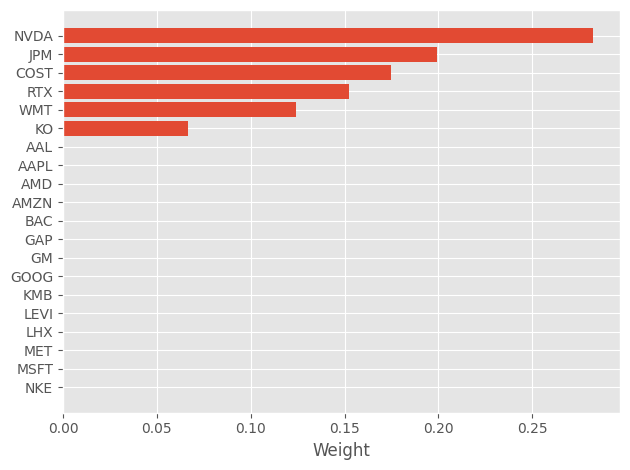

In [80]:
# Plot the max-sharpe portfolio weights
fig, ax = plt.subplots()
plotting.plot_weights(portfolio_weights)
plt.show()

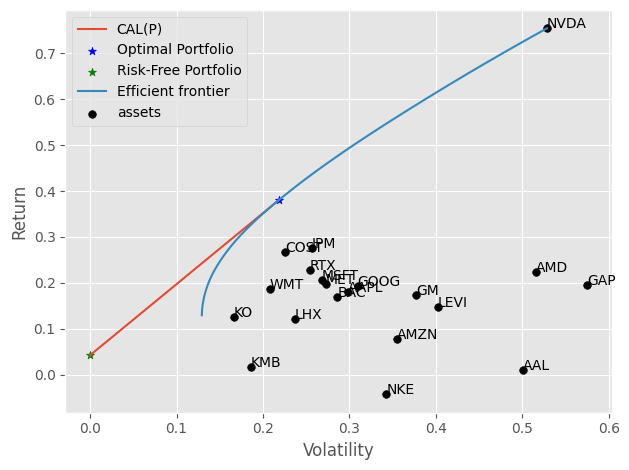

In [81]:
ef = EfficientFrontier(expected_returns, covariance_matrix)

# Extract the portfolio's expected return, volatility, and sharpe ratio
p_performance = frontier.portfolio_performance(risk_free_rate=RISK_FREE)
p_er = p_performance[0]
p_sd = p_performance[1]
p_sharpe = p_performance[2]

# Create the points for the portfolio's capital allocation line (CAL)
point_1 = (p_sd, p_er)
point_2 = (0, RISK_FREE)
x_coords = [point_1[0], point_2[0]]
y_coords = [point_1[1], point_2[1]]

# Plot the efficient frontier
fig, ax = plt.subplots()
plt.plot(x_coords, y_coords, label='CAL(P)')
plt.scatter(point_1[0], point_1[1], marker='*', color='b', label='Optimal Portfolio')   # Optimal portfolio
plt.scatter(point_2[0], point_2[1], marker='*', color='g', label='Risk-Free Portfolio') # Risk-free portfolio
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True, show_tickers=True)
plt.show()